## dataframe the keyphrases

In [95]:
# !pip install -r requirements.txt

In [96]:
import faculty.datasets as datasets
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import spacy
import re
from utils import clean3, is_pua, remove_punct_nums
from sentence_transformers import SentenceTransformer, util
import pickle
from tqdm.notebook import tqdm
import torch
%matplotlib inline

In [97]:
df = pd.read_csv('../data/final/clean_12k_JNNkeyphrases_100_similar.csv')
df = df.drop(['Unnamed: 0'],axis=1)
keywords = list(set(df.values.ravel().tolist()))
keywords

['electric car pool',
 'scotland governance',
 'westminster climate',
 'environmental assessment method',
 'mitigating climate',
 'civil contingency',
 'digestion',
 'alternative products',
 'executive summary leadership',
 'cabinet thursday',
 'substantial carbon members',
 'scatter pathways',
 'measured baseline request',
 'future tree',
 'district energy',
 'marshy grassland',
 'global',
 'emergency declaration',
 'net cost',
 'resilient design',
 'visitor offer',
 'property archetype',
 'storing',
 'national strategy',
 'different stages',
 'sustainable waste',
 'change knowledge',
 'transport scope',
 'cabinet date',
 'recommendations changes',
 'reduction transport',
 'services manager',
 'resilient species',
 'light fittings',
 'community task',
 'negligible population size',
 'local collaboration',
 'recovery plans',
 'water transport',
 'lichen heath communities',
 'stable temperature',
 'new leisure centre',
 'take',
 'general',
 'ongoing maintenance',
 'saving carbon',
 'hig

In [98]:
len(keywords)

12825

## Similar keywords
- recall we have minimised the similarity of keywords **within documents**
- now we want to maximise the similar of keywords within the **corpus**

In [99]:
import pickle

with open('../data/final/clean_12k_JNNkeyword_embeddings.pkl', "rb") as fIn:
    keyword_embeddings = pickle.load(fIn)


In [100]:
tensor_embeds = []
for key in tqdm(keyword_embeddings):
    value = keyword_embeddings[key]
    tensor_value = torch.from_numpy(value)
    tensor_embeds.append(tensor_value)

result = torch.stack(tensor_embeds)

  0%|          | 0/12825 [00:00<?, ?it/s]

In [101]:
result.shape

torch.Size([12825, 384])

## Dimensionality reduction

In [10]:
import umap.umap_ as umap

In [102]:
#atm no fine-tuning has been done
umapper = umap.UMAP(n_neighbors=15,metric='cosine',n_components = 5)
umap_vectors = umapper.fit_transform(result)

In [103]:
umap_vectors.shape

(12825, 5)

In [104]:
import seaborn as sns
def scatter_1(x,colors=[]):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect="equal")
    if colors != []:
        count_colors = len(np.unique(colors))
        palette = np.array(sns.color_palette("hls", count_colors))
        c = palette[colors.reshape(-1,).astype(np.int32)]
    else:
        c= None
    ax.scatter(x[:,0],x[:,1], s=0.2, c=c)
    return f, ax

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

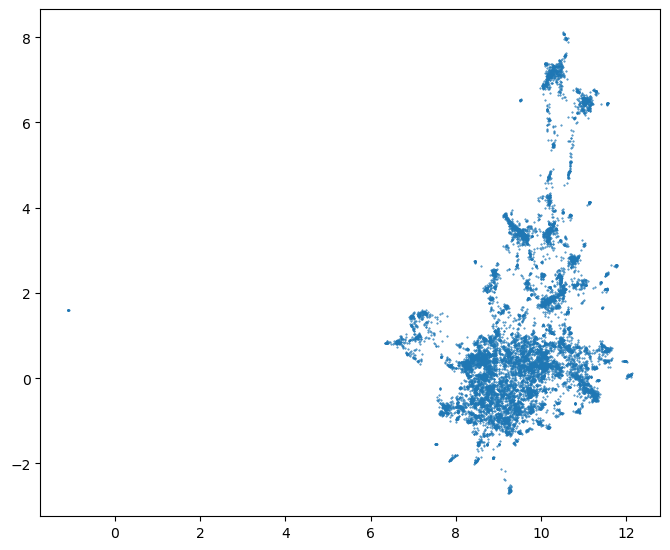

In [105]:
scatter_1(umap_vectors,[])

In [106]:
import hdbscan
clf = hdbscan.HDBSCAN(min_cluster_size=10)
indices = clf.fit_predict(umap_vectors)

In [107]:
indices_str  = list(map(str, indices))

In [108]:
indices_str

['171',
 '-1',
 '-1',
 '90',
 '-1',
 '219',
 '258',
 '162',
 '-1',
 '261',
 '-1',
 '135',
 '105',
 '76',
 '106',
 '50',
 '147',
 '-1',
 '-1',
 '289',
 '161',
 '37',
 '-1',
 '171',
 '45',
 '134',
 '90',
 '245',
 '66',
 '236',
 '227',
 '89',
 '22',
 '193',
 '136',
 '10',
 '159',
 '146',
 '92',
 '136',
 '56',
 '12',
 '21',
 '-1',
 '172',
 '-1',
 '223',
 '241',
 '100',
 '-1',
 '236',
 '-1',
 '0',
 '-1',
 '32',
 '6',
 '-1',
 '91',
 '270',
 '51',
 '-1',
 '-1',
 '-1',
 '68',
 '-1',
 '-1',
 '-1',
 '103',
 '60',
 '100',
 '128',
 '108',
 '100',
 '-1',
 '-1',
 '179',
 '272',
 '-1',
 '290',
 '183',
 '68',
 '216',
 '74',
 '69',
 '175',
 '136',
 '134',
 '197',
 '-1',
 '128',
 '209',
 '234',
 '-1',
 '87',
 '103',
 '241',
 '281',
 '118',
 '-1',
 '261',
 '68',
 '156',
 '-1',
 '127',
 '100',
 '187',
 '-1',
 '24',
 '-1',
 '-1',
 '-1',
 '128',
 '246',
 '260',
 '133',
 '32',
 '170',
 '9',
 '176',
 '143',
 '-1',
 '176',
 '130',
 '45',
 '281',
 '162',
 '-1',
 '128',
 '-1',
 '30',
 '80',
 '126',
 '-1',
 '241'

In [109]:
plot_df = pd.DataFrame(
    {'keyword':keywords,
     'x': umap_vectors[:,0],
     'y': umap_vectors[:,1],
     'cluster':indices_str}
)

df_filtered = plot_df[plot_df['cluster'] != "-1"]
import plotly.express as px

# assuming your dataframe is named df and has columns 'x', 'y', 'word', and 'cluster'
fig = px.scatter(plot_df, x='x', y='y', color='cluster', hover_name='keyword')

fig.show()

In [110]:
df = pd.DataFrame({'keywords':keywords,'cluster':indices})
df_clust =df.groupby('cluster')['keywords'].apply(lambda x: pd.Series(x.values)).unstack()
df_clust
# list(df_clust.loc[8])
# df_clust.to_csv('../data/processed/keywords-by-cluster.csv')

,0,1,2,3,4,5,6,7,8,9,...,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935
cluster,,,,,,,,,,,,,,,,,,,,,
-1,scotland governance,westminster climate,mitigating climate,executive summary leadership,substantial carbon members,emergency declaration,net cost,storing,general,saving carbon,...,public health improvement,water increase,operation development,community needs,strategic needs assessment,tube trailers,control theme,terms wakefield,carbon implications,corporate delivery framework
0,warwick district council,serious decline,collection services,amount,cities programme,economic sectors,good practice energy,business toolkit,renewable energy fund,domestic property,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,best practice energy,habitat,species decline,wastewater treatment,promotion resource,electric buses,bau pathway,wider borough,bau increase,scope tonnes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,greener futures,hot spells,network research,executive summary forestry,social factors,contract renewal,society functions,key documents,council table,waste facility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,strategy risks,fair food system,food production,planet steve,more pressure,comfortable homes,subsidy arrangements,active travel infrastructure,frequency,environmental strategy councils,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,integral element,last ice age,most council employees,ism tool,statutory duties,priorities,kent county,reporting conclusion,uk temperatures,intranet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,resilient design,impact statement,council departments,capital investment,overarching vision,strategic vision,proportionate increase,lifecycle,dioxide reduction,pollution reduction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,bristol city,climate strategy,literacy,borough,average amount,leisure experience,periods,measures,teacher participation,public reporting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
indices

array([18, -1, 22, ..., 10, 25, 11])

In [23]:
clf.labels_.max()

25

In [24]:
clf.probabilities_
centroids = []
for i,v in enumerate(clf.probabilities_):
    if v == 1.0 and indices[i] != -1:
        centroids.append(i)
len(centroids)

1150

/tmp/ipykernel_158/3559217998.py:5: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

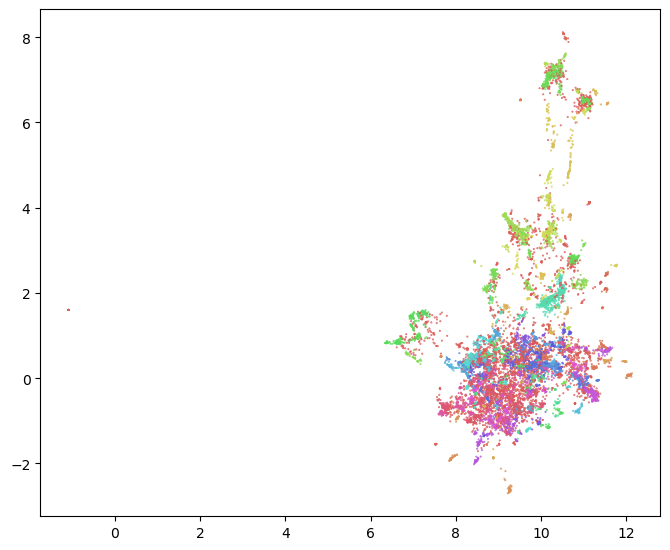

In [111]:
#red means no cluster
scatter_1(umap_vectors,indices)

In [48]:
import plotly.express as px
from scipy.spatial.distance import cdist

# assuming `reduced_data` is a 2D numpy array containing the dimensionality-reduced data
# and `cluster_labels` is a 1D numpy array containing the cluster labels for each data point assigned by HDBSCAN
# and `keywords` is a list of words corresponding to each data point in `reduced_data`
reduced_data = umap_vectors
cluster_labels = indices
keykey = []

plot_data = pd.DataFrame(reduced_data, columns=['x', 'y'])
plot_data['cluster'] = cluster_labels

fig = px.scatter(plot_data, x='x', y='y', color='cluster')

# calculate the medoids of each cluster
def find_medoid(data):
    distances = cdist(data[['x', 'y']], data[['x', 'y']])
    medoid = data.iloc[np.argmin(distances.sum(axis=0))]
    return pd.DataFrame({'medoid_x': [medoid['x']], 'medoid_y': [medoid['y']]})

medoids = plot_data.groupby('cluster').apply(find_medoid).reset_index()

# add text labels to the plot at the location of each medoid
for i, row in medoids.iterrows():
    # find the index of the data point closest to the medoid
    idx = np.argmin(np.linalg.norm(reduced_data - row[['medoid_x', 'medoid_y']].values, axis=1))
    # look up the corresponding word in your list of words
    word = keywords[idx]
    keykey.append(word)
    fig.add_annotation(x=row['medoid_x'], y=row['medoid_y'], text=word)

fig.show()

In [15]:
fig.write_html("../data/processed/plotly-3.html")

In [16]:
keykey

['costs flood',
 'paris',
 'runaway heating',
 'clear distinction',
 'breakdown',
 'sustainable housing',
 'effective alternatives',
 'corporate priority objective',
 'waste homeowners',
 'citywide agenda',
 'local agriculture',
 'sustainable future',
 'additional emissions',
 'soil conditions',
 'plan policy',
 'alternative fuels',
 'specific risks',
 'further analysis',
 'resilient species',
 'circular economy programme',
 'move transport',
 'planning decisions',
 'limited government grant',
 'utilise technology',
 'policy initiatives',
 'liquid materials',
 'gravel extraction',
 'biomass generation',
 'ecosystems',
 'procurement specification',
 'provide value',
 'reduction programme',
 'scheme contribution',
 'type installations',
 'eco action',
 'footprint breakdown',
 'future action page',
 'public realm contract',
 'energy reduction',
 'other groups persons',
 'exeter plan',
 'energy schemes',
 'key categories',
 'commission liverpool',
 'hope',
 'electricity use',
 'ongoing rep

## topicBERT

In [112]:
trunk_df = pd.read_csv('../data/processed/split_corpus.csv')
truncated_corpus = trunk_df['0'].to_list()

In [113]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

my_vectoriser = CountVectorizer(
    stop_words='english',
    min_df=3,
    ngram_range=(2,3),
    tokenizer= LemmaTokenizer()
)

In [114]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.8)

# Create your representation model
# representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)


topics, probs = topic_model.fit_transform(truncated_corpus)

In [21]:
topic_model.update_topics(truncated_corpus, vectorizer_model=my_vectoriser)

In [115]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,247,-1_climate_council_our_change
1,0,68,0_emissions_plan_management_buildings
2,1,57,1_emergency_council_on_be
3,2,31,2_zero_emissions_council_our
4,3,30,3_council_our_carbon_strategy
5,4,28,4_our_climate_change_strategy
6,5,23,5_climate_our_emergency_council
7,6,16,6_climate_our_change_borough


In [116]:
topic_model.get_topic(5)

[('climate', 0.04406160367762727),
 ('our', 0.04195521459195573),
 ('emergency', 0.028456333066362877),
 ('council', 0.0255224406537582),
 ('gloucestershire', 0.02328106572265783),
 ('carbon', 0.021289864186406014),
 ('have', 0.020965185589846606),
 ('be', 0.019407672598097656),
 ('change', 0.019121819837513418),
 ('strategy', 0.015721655229308712)]

In [28]:
topic_fig = topic_model.visualize_topics()
topic_fig.write_html('../data/processed/topic-distance.html')

## keyBERT inspired

In [117]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import PartOfSpeech
from bertopic import BERTopic
from keyphrase_vectorizers import KeyphraseCountVectorizer

pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
representation_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns)


my_vectorizer = KeyphraseCountVectorizer(pos_pattern= '<J.*>?<N.*>{1,2}')     #pos_pattern='<N.*>')
topic_model = BERTopic(representation_model= representation_model,vectorizer_model=my_vectorizer)
topics, probs = topic_model.fit_transform(truncated_corpus)

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/bertopic/vectorizers/_ctfidf.py:69: RuntimeWarning:

divide by zero encountered in true_divide



In [118]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,253,-1_climate_council_carbon_change
1,0,74,0_carbon_energy_council_emissions
2,1,57,1_climate_emergency_council_action
3,2,30,2_climate_change_council_strategy
4,3,30,3_net_carbon_emissions_city
5,4,23,4_climate_change_need_carbon
6,5,21,5_climate_somerset_emergency_plan
7,6,12,6_climate_change_borough_council


In [94]:
topic_model.get_topic(16)

[('derbyshire', 0.037749968816440424),
 ('change', 0.030335447594587592),
 ('climate', 0.028688006949486755),
 ('derby', 0.02816870805030297),
 ('northamptonshire', 0.02788782726914982),
 ('local', 0.027294874324200948),
 ('strategy', 0.024293444893636804),
 ('partnership', 0.017394602884173424),
 ('strategies', 0.01610149619993346),
 ('county', 0.01581462623917826)]

In [119]:
topic_fig2 = topic_model.visualize_topics()
topic_fig2

In [32]:
topic_fig2.write_html('../data/processed/keybert-inspired-topic-plot.html')